In [ ]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 필수 라이브러리
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

data_path = '/content/processed_datasets.csv'
data = pd.read_csv(data_path)
raw_data = pd.read_csv('/content/datasets.csv')

In [ ]:
# 타겟값 변환
raw_data['Attrition'] = raw_data['Attrition'].map({'Yes': 1, 'No': 0})
raw_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
raw_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


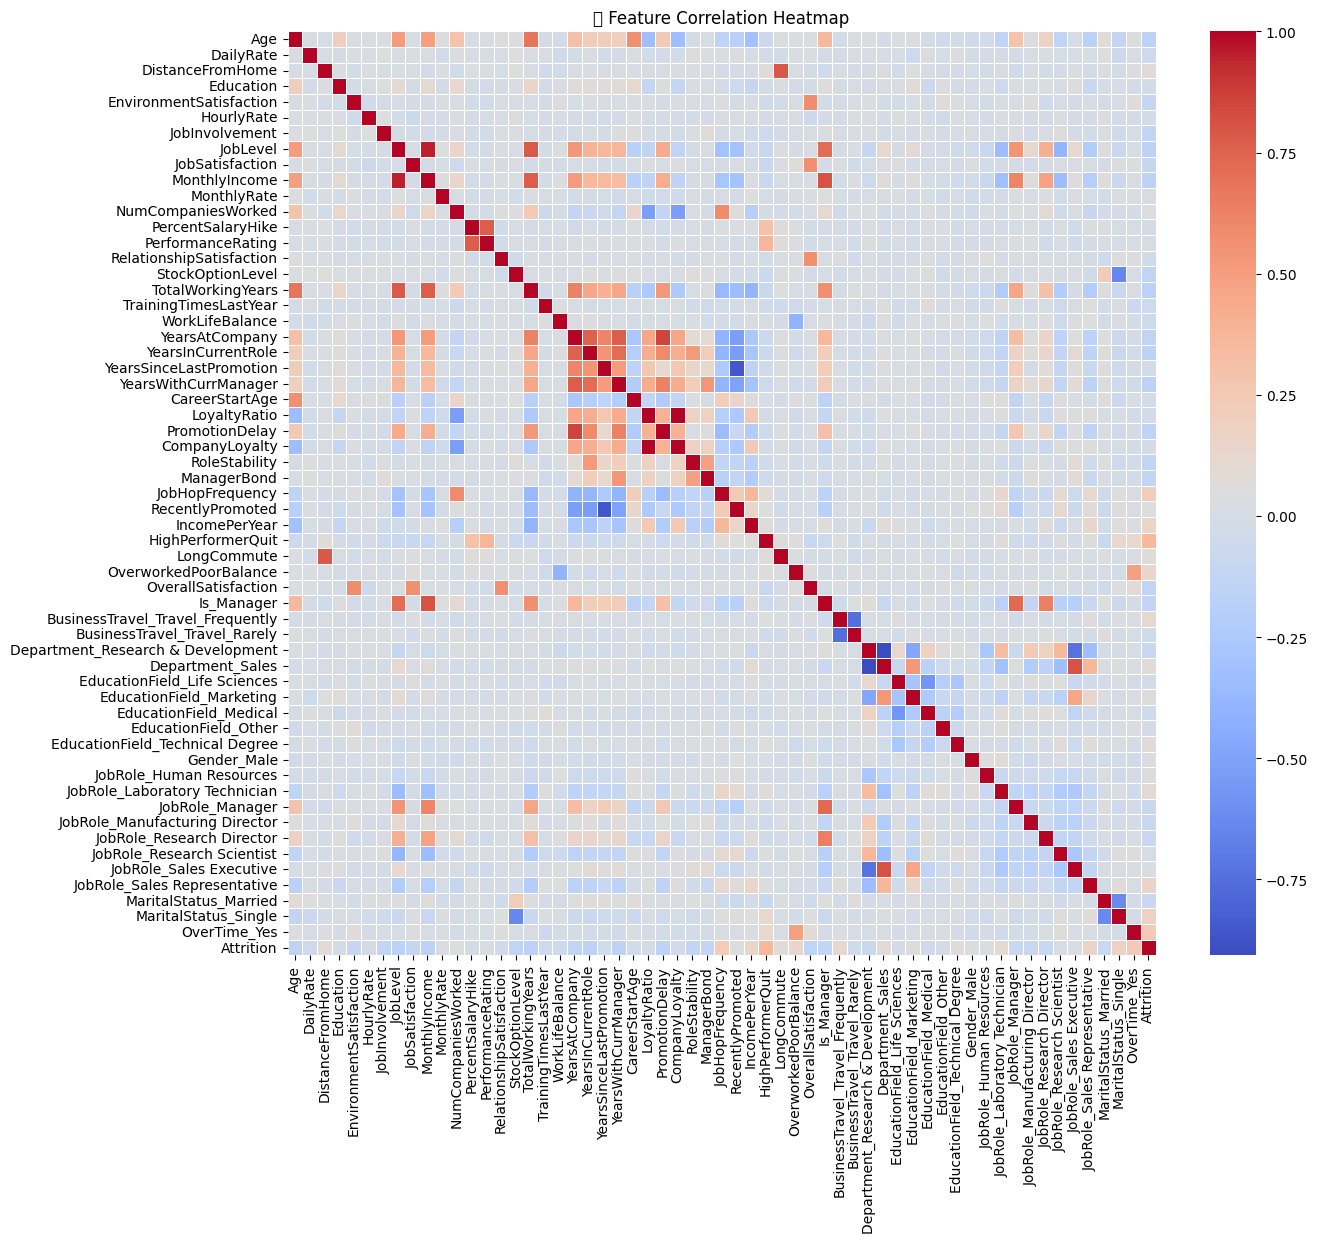

<ipython-input-5-56c7914e6b19>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='RdBu')
<ipython-input-5-56c7914e6b19>:25: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-56c7914e6b19>:25: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-56c7914e6b19>:25: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-56c7914e6b19>:25: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-56c7914e6b19>:25: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

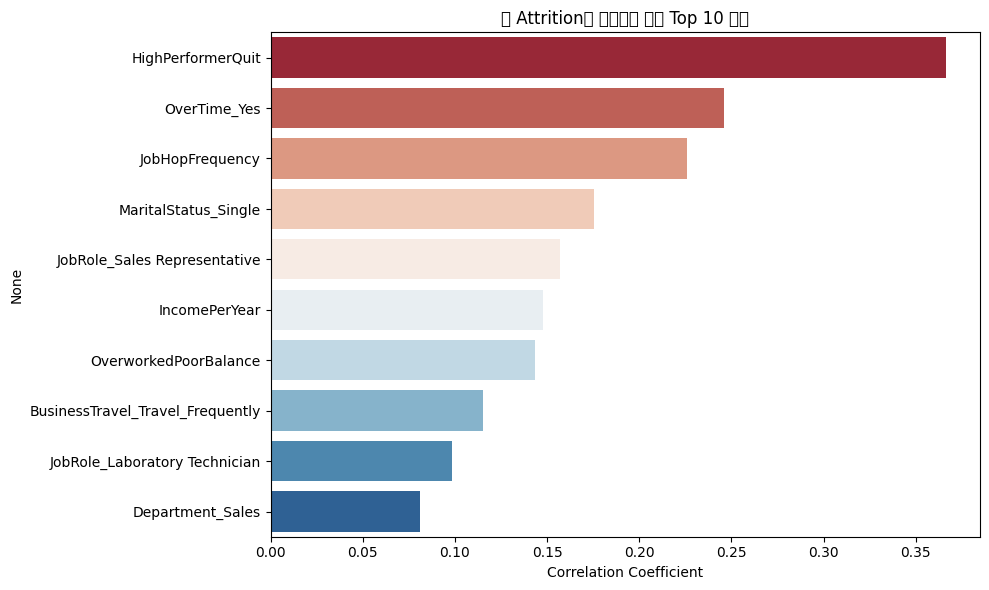

<ipython-input-5-56c7914e6b19>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='RdBu')
<ipython-input-5-56c7914e6b19>:34: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-56c7914e6b19>:34: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-56c7914e6b19>:34: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-56c7914e6b19>:34: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-56c7914e6b19>:34: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

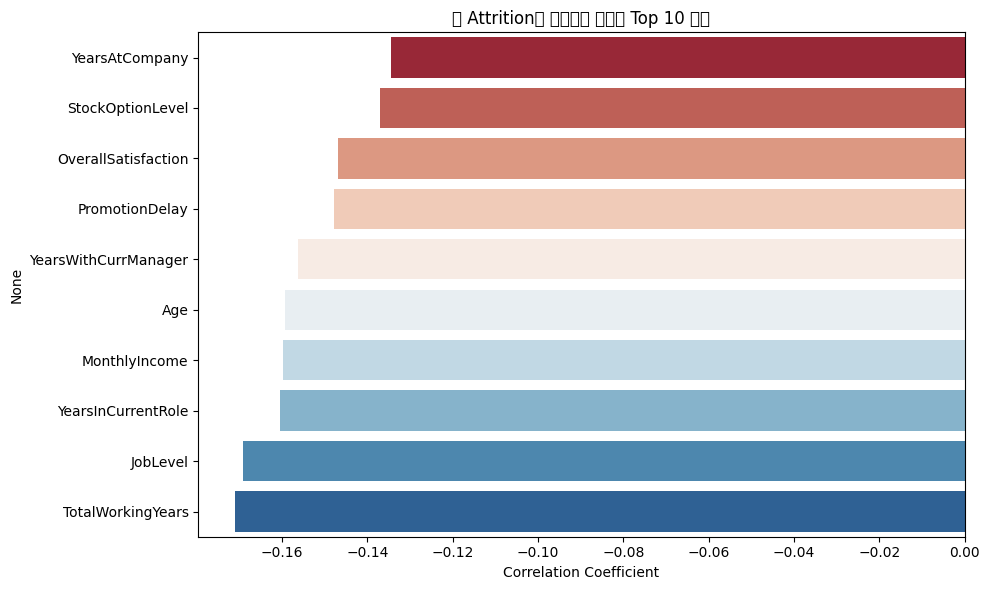

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 수치형 컬럼만 추출
numeric_features = data.select_dtypes(include=[np.number])

# 2. 상관계수 계산
corr_matrix = numeric_features.corr()

# 3. Attrition과 상관관계가 높은 순으로 정렬
target_corr = corr_matrix['Attrition'].sort_values(ascending=False)

# 4. 전체 heatmap 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('🔥 Feature Correlation Heatmap')
plt.show()

# 5. Attrition 상관계수 상위 10개만 시각화 (타겟 중심 분석)
top_corr_features = target_corr[1:11]  # 0번째는 Attrition 자기 자신
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='RdBu')
plt.title('🎯 Attrition과 상관관계 높은 Top 10 변수')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# 5. Attrition 상관계수 상위 10개만 시각화 (타겟 중심 분석)
top_corr_features = target_corr[-10:]  # 0번째는 Attrition 자기 자신
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='RdBu')
plt.title('🎯 Attrition과 상관관계 낮은은 Top 10 변수')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


In [ ]:
# 5. 제거할 칼럼
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
data.drop(columns=drop_cols, inplace=True)
data.head(5)

In [26]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [27]:
# ------------------------------------------------------
# 📂 0. 데이터 로드 & 초기 정리
# ------------------------------------------------------
data_path = '/content/datasets.csv'
data = pd.read_csv(data_path)

In [28]:
# 불필요한 컬럼 제거
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
data.drop(columns=drop_cols, inplace=True)

In [29]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [30]:
# 타겟값 변환:각 범주형 변수 수치 매핑
data['Attrition'] = data['Attrition'].map({
    'Yes': 1,
    'No': 0
})

data['BusinessTravel'] = data['BusinessTravel'].map({
    'Non-Travel':0,
    'Travel_Frequently':1,
    'Travel_Rarely':2
})

data['Gender'] = data['Gender'].map({
    'Female': 0,
    'Male': 1
})

In [31]:
# 6. 컬럼 타입 나누기
numeric_features = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Attrition']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


In [32]:
# 7. 전처리 파이프라인 구성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 각 모델에 대해 하이퍼파라미터 그리드 정의
param_grids = {
    # 'Logistic Regression': {
    #     'classifier__C': [0.1, 1, 10],  # 정규화 파라미터
    #     'classifier__solver': ['liblinear', 'saga']  # Solver 선택
    # },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__class_weight': ['balanced']

    }
  # ,


    # 'Gradient Boosting': {
    #     'classifier__n_estimators': [100, 200],
    #     'classifier__learning_rate': [0.01, 0.1, 0.5],
    #     'classifier__max_depth': [3, 5, 7]
#     # },
#     'Naive Bayes': {
#         'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
#     },
#     'XGBoost': {
#         'classifier__n_estimators': [100, 200],
#         'classifier__learning_rate': [0.01, 0.1],
#         'classifier__max_depth': [3, 6]
#     },
#     'LightGBM': {
#         'classifier__n_estimators': [100, 200],
#         'classifier__learning_rate': [0.01, 0.1],
#         'classifier__num_leaves': [31, 50]
#     }
# }

# cat_params={
#     'CatBoost': {
#         'classifier__iterations': [100, 200],
#         'classifier__learning_rate': [0.01, 0.1],
#         'classifier__depth': [3, 5, 7]
#     }
}

#8. 전체 파이프라인 구성
lr_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=3000))
])

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

gb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

nb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

lgbm_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(verbosity=-1))
])

cat_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(verbose=False))
])

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 전처리 구성
preprocessor_for_tree_models = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Tree는 scaling 필요 없음
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

preprocessor_for_nb = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# RandomForestClassifier 파이프라인
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_for_tree_models),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Gaussian Naive Bayes 파이프라인
nb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_for_nb),
    ('classifier', GaussianNB())
])

# XGBoost
xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_for_tree_models),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# LightGBM
lgbm_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_for_tree_models),
    ('classifier', LGBMClassifier(verbosity=-1))
])

# CatBoost - ❗️전처리 없이 바로 raw categorical 처리
# → 따로 OneHot 안 함. 따로 preprocessor 필요 없음.
cat_clf = CatBoostClassifier(verbose=False)

# 예: 훈련 시 cat_features 명시
# cat_clf.fit(X_train, y_train, cat_features=cat_feature_indices)


In [35]:
from sklearn.model_selection import train_test_split

# 9. 데이터 분리
X = data.drop(columns='Attrition')
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)


In [36]:
# 10-1. 학습 및 예측 (scoring : accuracy)
# clf_list = [lr_clf, rf_clf, gb_clf, nb_clf, xgb_clf, lgbm_clf, cat_clf]
clf_list = [rf_clf]
best_acc = 0.0
best_clf = None
best_model_name = ""
best_params = {}
scoring_list = ['accuracy', 'recall', 'f1']
scoring = scoring_list[0]
categorical_features = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

# 2. GridSearchCV를 사용한 모델 학습 및 하이퍼파라미터 튜닝
for clf, model_name in zip(clf_list, param_grids.keys()):
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[model_name], cv=5, scoring=scoring, verbose=1, error_score='raise')
    if clf is cat_clf:
        grid_search.fit(X_train, y_train,cat_features=categorical_features)
    else:
        grid_search.fit(X_train, y_train)

    # 가장 좋은 성능의 모델과 파라미터 저장
    if grid_search.best_score_ > best_acc:
        best_acc = grid_search.best_score_
        best_clf = grid_search.best_estimator_
        best_model_name = model_name
        best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [38]:
# 3. 최적의 모델로 예측 및 평가
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]  # Yes일 확률

# 평가 출력
print(f"Best Model: {best_model_name} with {scoring}")
print(f"Best Hyperparameters: {best_params}")
print(classification_report(y_test, y_pred))
print("==============================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("==============================")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Best Model: Random Forest with accuracy
Best Hyperparameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.55      0.13      0.21        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294

Accuracy: 0.8435374149659864
ROC AUC: 0.7638


In [39]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

def find_best_threshold_by_acc(y_true, y_proba, step=0.01):
    best_threshold = 0
    best_acc = 0

    for threshold in np.arange(0.1, 0.91, step):
        y_pred = (y_proba >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)

        if acc > best_acc:
            best_acc = acc
            best_threshold = threshold
    y_pred = best_clf.predict(X_test)
    y_proba = best_clf.predict_proba(X_test)[:, 1]


    return best_threshold, best_acc

best_threshold, best_acc = find_best_threshold_by_acc(y_test, y_proba)

print(f"acc Score 기준 최적 Threshold: {best_threshold:.2f}")
print(f"해당 acc Score: {best_acc:.4f}")

acc Score 기준 최적 Threshold: 0.51
해당 acc Score: 0.8469


In [40]:
# 10-2. 학습 및 예측 (scoring : recall)
# clf_list = [lr_clf, rf_clf, gb_clf, nb_clf, xgb_clf, lgbm_clf, cat_clf]
clf_list = [rf_clf]
best_acc = 0.0
best_clf = None
best_model_name = ""
best_params = {}
scoring_list = ['accuracy', 'recall', 'f1']
scoring = scoring_list[1]
categorical_features = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

# 2. GridSearchCV를 사용한 모델 학습 및 하이퍼파라미터 튜닝
for clf, model_name in zip(clf_list, param_grids.keys()):
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[model_name], cv=5, scoring=scoring, verbose=1, error_score='raise')
    if clf is cat_clf:
        grid_search.fit(X_train, y_train,cat_features=categorical_features)
    else:
        grid_search.fit(X_train, y_train)

    # 가장 좋은 성능의 모델과 파라미터 저장
    if grid_search.best_score_ > best_acc:
        best_acc = grid_search.best_score_
        best_clf = grid_search.best_estimator_
        best_model_name = model_name
        best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [41]:
# 3. 최적의 모델로 예측 및 평가
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]  # Yes일 확률

# 평가 출력
print(f"Best Model: {best_model_name} with {scoring}")
print(f"Best Hyperparameters: {best_params}")
print(classification_report(y_test, y_pred))
print("==============================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("==============================")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Best Model: Random Forest with recall
Best Hyperparameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.47      0.15      0.23        47

    accuracy                           0.84       294
   macro avg       0.66      0.56      0.57       294
weighted avg       0.79      0.84      0.80       294

Accuracy: 0.8367346938775511
ROC AUC: 0.7588


In [42]:
best_threshold, best_acc = find_best_threshold_by_acc(y_test, y_proba)

print(f"{scoring} 기준 최적 Threshold: {best_threshold:.2f}")
print(f"해당 accuracy Score: {best_acc:.4f}")

recall 기준 최적 Threshold: 0.45
해당 accuracy Score: 0.8503


In [43]:
# 10-3. 학습 및 예측 (scoring : f1)
# clf_list = [lr_clf, rf_clf, gb_clf, nb_clf, xgb_clf, lgbm_clf, cat_clf]
clf_list = [rf_clf]
best_acc = 0.0
best_clf = None
best_model_name = ""
best_params = {}
scoring_list = ['accuracy', 'recall', 'f1']
scoring = scoring_list[2]
categorical_features = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

# 2. GridSearchCV를 사용한 모델 학습 및 하이퍼파라미터 튜닝
for clf, model_name in zip(clf_list, param_grids.keys()):
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[model_name], cv=5, scoring=scoring, verbose=1, error_score='raise')
    if clf is cat_clf:
        grid_search.fit(X_train, y_train,cat_features=categorical_features)
    else:
        grid_search.fit(X_train, y_train)

    # 가장 좋은 성능의 모델과 파라미터 저장
    if grid_search.best_score_ > best_acc:
        best_acc = grid_search.best_score_
        best_clf = grid_search.best_estimator_
        best_model_name = model_name
        best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [44]:
# 3. 최적의 모델로 예측 및 평가
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]  # Yes일 확률

# 평가 출력
print(f"Best Model: {best_model_name} with {scoring}")
print(f"Best Hyperparameters: {best_params}")
print(classification_report(y_test, y_pred))
print("==============================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("==============================")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Best Model: Random Forest with f1
Best Hyperparameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.47      0.15      0.23        47

    accuracy                           0.84       294
   macro avg       0.66      0.56      0.57       294
weighted avg       0.79      0.84      0.80       294

Accuracy: 0.8367346938775511
ROC AUC: 0.7588


In [45]:
best_threshold, best_acc = find_best_threshold_by_acc(y_test, y_proba)

print(f"{scoring} 기준 최적 Threshold: {best_threshold:.2f}")
print(f"해당 accuracy Score: {best_acc:.4f}")

f1 기준 최적 Threshold: 0.45
해당 accuracy Score: 0.8503
